# CandyParty task generation

In [1]:
# General importations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import string
from random import shuffle,seed,choices
from faker import Faker
from faker.providers.person.en import Provider
import networkx as nx
import itertools

from utils import Utils
from candy_party import CandyParty
from dataset_generator import DataSetGenerator

In [2]:
u = Utils()
dg = DataSetGenerator()

## Error test (low complexity)

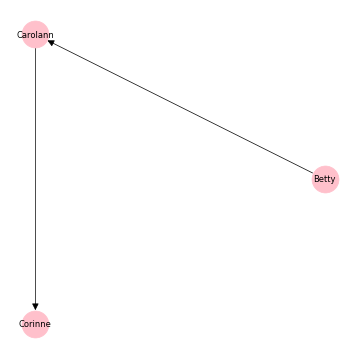


Causal context: A group of friends is going to a party where candies will be randomly distributed. Betty will be happy if she gets at least 5 candies. Carolann will be happy if she gets at least 5 candies or if Betty is happy. Corinne will be happy if she gets at least 5 candies or if Carolann is happy. 

Sample context:  After distributing the candies, Betty gets 2 candies, Carolann gets 6 candies, and Corinne gets 2 candies.

- Global cause-effect pairs: ('Betty', 'Corinne')
- Local cause-effect pairs: [('Betty', 'Carolann'), ('Carolann', 'Corinne')]
- Compositions: [[('Betty', 'Carolann'), ('Carolann', 'Corinne')]]


In [3]:
size = [2,2]
tg = CandyParty(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())

In [4]:
print()
print("- Factual queries:")
display(tg.get_factual_queries())


- Factual queries:


{'Corinne': {'Prompt': 'Is Corinne happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Betty': 0, 'Carolann': 1, 'Corinne': 1},
  'True exogenous': {'NAZ8': 0, 'MOBY': 1, 'VE85': 0},
  'True response': 1},
 'Carolann': {'Prompt': 'Is Carolann happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Betty': 0, 'Carolann': 1, 'Corinne': 1},
  'True exogenous': {'NAZ8': 0, 'MOBY': 1, 'VE85': 0},
  'True response': 1}}

In [5]:
cf_1, cf_0 = tg.get_counterfactual_queries()
print("- Counterfactual queries (cause = True):")
for key,val in cf_1.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = True):

-----------------------

-- ('Betty', 'Corinne') --
Prompt: Now, suppose that Betty is happy regardless of all other circumstances. With this new assumption, is Corinne happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Betty': 1, 'Carolann': 1, 'Corinne': 1}
True exogenous: {'NAZ8': 0, 'MOBY': 1, 'VE85': 0}
True response: 1

-----------------------

-- ('Betty', 'Carolann') --
Prompt: Now, suppose that Betty is happy regardless of all other circumstances. With this new assumption, is Carolann happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Betty': 1, 'Carolann': 1, 'Corinne': 1}
True exogenous: {'NAZ8': 0, 'MOBY': 1, 'VE85': 0}
True response: 1

-----------------------

-- ('Carolann', 'Corinne') --
Prompt: Now, suppose that Carolann is happy regardless of all other circumstances. With this new assumption, is Corinne happy? Begin your response with Yes or No a

In [6]:
print("- Counterfactual queries (cause = False):")
for key,val in cf_0.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = False):

-----------------------

-- ('Betty', 'Corinne') --
Prompt: Now, suppose that Betty is happy regardless of all other circumstances. With this new assumption, is Corinne happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Betty': 0, 'Carolann': 1, 'Corinne': 1}
True exogenous: {'NAZ8': 0, 'MOBY': 1, 'VE85': 0}
True response: 1

-----------------------

-- ('Betty', 'Carolann') --
Prompt: Now, suppose that Betty is happy regardless of all other circumstances. With this new assumption, is Carolann happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Betty': 0, 'Carolann': 1, 'Corinne': 1}
True exogenous: {'NAZ8': 0, 'MOBY': 1, 'VE85': 0}
True response: 1

-----------------------

-- ('Carolann', 'Corinne') --
Prompt: Now, suppose that Carolann is happy regardless of all other circumstances. With this new assumption, is Corinne happy? Begin your response with Yes or No 

In [7]:
# Test observational data generation.
df_obs, df_noise = tg.sample_scm(n = 5,
                                 intervene_node = None,
                                 intervene_value = 0)
display(df_obs.head())
display(df_noise.head())

Betty  Carolann  Corinne
0      1         1        0
1      1         1        1
2      0         1        1
3      0         0        0
4      0         0        0

NAZ8  MOBY  VE85
0     1     0     0
1     1     1     1
2     0     1     1
3     0     0     1
4     0     0     1

In [8]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 1
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Betty = 1 --


Betty  Carolann  Corinne
0      1         1        0
1      1         1        1
2      1         1        1
3      1         1        1
4      1         1        1

NAZ8  MOBY  VE85
0     1     0     0
1     1     1     1
2     0     1     1
3     0     0     1
4     0     0     1


-- Carolann = 1 --


Betty  Carolann  Corinne
0      1         1        0
1      1         1        1
2      0         1        1
3      0         1        1
4      0         1        1

NAZ8  MOBY  VE85
0     1     0     0
1     1     1     1
2     0     1     1
3     0     0     1
4     0     0     1

In [9]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 0
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Betty = 0 --


Betty  Carolann  Corinne
0      0         0        0
1      0         1        1
2      0         1        1
3      0         0        0
4      0         0        0

NAZ8  MOBY  VE85
0     1     0     0
1     1     1     1
2     0     1     1
3     0     0     1
4     0     0     1


-- Carolann = 0 --


Betty  Carolann  Corinne
0      1         0        0
1      1         0        0
2      0         0        0
3      0         0        0
4      0         0        0

NAZ8  MOBY  VE85
0     1     0     0
1     1     1     1
2     0     1     1
3     0     0     1
4     0     0     1

## Error test (moderate complexity)

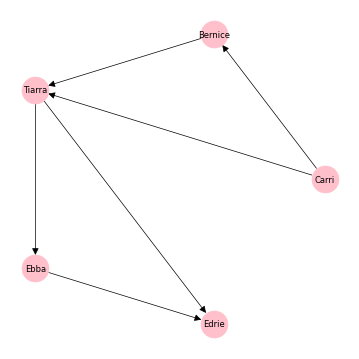


Causal context: A group of friends is going to a party where candies will be randomly distributed. Carri will be happy if she gets at least 5 candies. Bernice will be happy if she gets at least 5 candies or if Carri is happy. Tiarra will be happy if she gets at least 5 candies or if Carri is happy or if Bernice is happy. Ebba will be happy if she gets at least 5 candies or if Tiarra is happy. Edrie will be happy if she gets at least 5 candies or if Tiarra is happy or if Ebba is happy. 

Sample context:  After distributing the candies, Carri gets 3 candies, Bernice gets 4 candies, Tiarra gets 7 candies, Ebba gets 4 candies, and Edrie gets 2 candies.

- Global cause-effect pairs: ('Carri', 'Edrie')
- Local cause-effect pairs: [('Carri', 'Tiarra'), ('Tiarra', 'Edrie')]
- Compositions: [[('Carri', 'Tiarra'), ('Tiarra', 'Edrie')]]


In [10]:
size = [3,3]
tg = CandyParty(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())

In [11]:
print()
print("- Factual queries:")
display(tg.get_factual_queries())


- Factual queries:


{'Edrie': {'Prompt': 'Is Edrie happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Carri': 0,
   'Bernice': 0,
   'Tiarra': 1,
   'Ebba': 1,
   'Edrie': 1},
  'True exogenous': {'OGCU': 0, 'PE2M': 0, 'FVL2': 1, 'J57T': 0, 'GDJ4': 0},
  'True response': 1},
 'Tiarra': {'Prompt': 'Is Tiarra happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Carri': 0,
   'Bernice': 0,
   'Tiarra': 1,
   'Ebba': 1,
   'Edrie': 1},
  'True exogenous': {'OGCU': 0, 'PE2M': 0, 'FVL2': 1, 'J57T': 0, 'GDJ4': 0},
  'True response': 1}}

In [12]:
cf_1, cf_0 = tg.get_counterfactual_queries()
print("- Counterfactual queries (cause = True):")
for key,val in cf_1.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = True):

-----------------------

-- ('Carri', 'Edrie') --
Prompt: Now, suppose that Carri is happy regardless of all other circumstances. With this new assumption, is Edrie happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Carri': 1, 'Bernice': 1, 'Tiarra': 1, 'Ebba': 1, 'Edrie': 1}
True exogenous: {'OGCU': 0, 'PE2M': 0, 'FVL2': 1, 'J57T': 0, 'GDJ4': 0}
True response: 1

-----------------------

-- ('Carri', 'Tiarra') --
Prompt: Now, suppose that Carri is happy regardless of all other circumstances. With this new assumption, is Tiarra happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Carri': 1, 'Bernice': 1, 'Tiarra': 1, 'Ebba': 1, 'Edrie': 1}
True exogenous: {'OGCU': 0, 'PE2M': 0, 'FVL2': 1, 'J57T': 0, 'GDJ4': 0}
True response: 1

-----------------------

-- ('Tiarra', 'Edrie') --
Prompt: Now, suppose that Tiarra is happy regardless of all other circumstances. With thi

In [13]:
print("- Counterfactual queries (cause = False):")
for key,val in cf_0.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = False):

-----------------------

-- ('Carri', 'Edrie') --
Prompt: Now, suppose that Carri is happy regardless of all other circumstances. With this new assumption, is Edrie happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Carri': 0, 'Bernice': 0, 'Tiarra': 1, 'Ebba': 1, 'Edrie': 1}
True exogenous: {'OGCU': 0, 'PE2M': 0, 'FVL2': 1, 'J57T': 0, 'GDJ4': 0}
True response: 1

-----------------------

-- ('Carri', 'Tiarra') --
Prompt: Now, suppose that Carri is happy regardless of all other circumstances. With this new assumption, is Tiarra happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Carri': 0, 'Bernice': 0, 'Tiarra': 1, 'Ebba': 1, 'Edrie': 1}
True exogenous: {'OGCU': 0, 'PE2M': 0, 'FVL2': 1, 'J57T': 0, 'GDJ4': 0}
True response: 1

-----------------------

-- ('Tiarra', 'Edrie') --
Prompt: Now, suppose that Tiarra is happy regardless of all other circumstances. With th

In [14]:
# Test observational data generation.
df_obs, df_noise = tg.sample_scm(n = 5,
                                 intervene_node = None,
                                 intervene_value = 0)
display(df_obs.head())
display(df_noise.head())

Carri  Bernice  Tiarra  Ebba  Edrie
0      1        1       1     1      0
1      1        1       1     1      0
2      0        1       1     1      1
3      0        0       1     1      0
4      0        0       1     1      0

OGCU  PE2M  FVL2  J57T  GDJ4
0     1     0     0     1     0
1     1     1     1     0     0
2     0     1     1     0     1
3     0     0     1     1     0
4     0     0     1     1     0

In [15]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 1
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Carri = 1 --


Carri  Bernice  Tiarra  Ebba  Edrie
0      1        1       1     1      0
1      1        1       1     1      0
2      1        1       1     1      1
3      1        1       1     1      0
4      1        1       1     1      0

OGCU  PE2M  FVL2  J57T  GDJ4
0     1     0     0     1     0
1     1     1     1     0     0
2     0     1     1     0     1
3     0     0     1     1     0
4     0     0     1     1     0


-- Tiarra = 1 --


Carri  Bernice  Tiarra  Ebba  Edrie
0      1        1       1     1      0
1      1        1       1     1      0
2      0        1       1     1      1
3      0        0       1     1      0
4      0        0       1     1      0

OGCU  PE2M  FVL2  J57T  GDJ4
0     1     0     0     1     0
1     1     1     1     0     0
2     0     1     1     0     1
3     0     0     1     1     0
4     0     0     1     1     0

In [16]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 0
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Carri = 0 --


Carri  Bernice  Tiarra  Ebba  Edrie
0      0        0       0     1      0
1      0        1       1     1      0
2      0        1       1     1      1
3      0        0       1     1      0
4      0        0       1     1      0

OGCU  PE2M  FVL2  J57T  GDJ4
0     1     0     0     1     0
1     1     1     1     0     0
2     0     1     1     0     1
3     0     0     1     1     0
4     0     0     1     1     0


-- Tiarra = 0 --


Carri  Bernice  Tiarra  Ebba  Edrie
0      1        1       0     1      0
1      1        1       0     0      0
2      0        1       0     0      0
3      0        0       0     1      0
4      0        0       0     1      0

OGCU  PE2M  FVL2  J57T  GDJ4
0     1     0     0     1     0
1     1     1     1     0     0
2     0     1     1     0     1
3     0     0     1     1     0
4     0     0     1     1     0

In [17]:
glo = [tg.get_global()]
loc = tg.get_local()
comp = tg.get_compositions()

print(glo)
print(loc)
print(comp)

[('Carri', 'Edrie')]
[('Carri', 'Tiarra'), ('Tiarra', 'Edrie')]
[[('Carri', 'Tiarra'), ('Tiarra', 'Edrie')]]


In [18]:
# Get PNS and compare to ATE.
results_dict = dict()
for n in [5,10,50,100,500,1000,5000]:
    pair_dict = dict()
    for pair in glo+loc:
        df_cf, df_noise = tg.sample_scm(n = n,
                                        intervene_node = pair[0],
                                        intervene_value = 1)
        df_cf.rename(columns={pair[1]: 'True (cause = True)'}, inplace = True)
        df_cf_0, df_noise = tg.sample_scm(n = n,
                                          intervene_node = pair[0],
                                          intervene_value = 0)
        df_cf["True (cause = False)"] = df_cf_0[pair[1]]
        display(df_cf.head(5))
        print("\n-- {} | n = {} --".format(pair,n))
        pns = dg.get_pns_ate(df_cf)
        pair_dict[pair] = pns
    results_dict[n] = pair_dict

Carri  Bernice  Tiarra  Ebba  True (cause = True)  True (cause = False)
0      1        1       1     1                    0                     0
1      1        1       1     1                    0                     0
2      1        1       1     1                    1                     1
3      1        1       1     1                    0                     0
4      1        1       1     1                    0                     0


-- ('Carri', 'Edrie') | n = 5 --
-- PNS = 0.0 | ATE = 0.0 --


Carri  Bernice  True (cause = True)  Ebba  Edrie  True (cause = False)
0      1        1                    1     1      0                     0
1      1        1                    1     1      0                     1
2      1        1                    1     1      1                     1
3      1        1                    1     1      0                     1
4      1        1                    1     1      0                     1


-- ('Carri', 'Tiarra') | n = 5 --
-- PNS = 0.2 | ATE = 0.19999999999999996 --


Carri  Bernice  Tiarra  Ebba  True (cause = True)  True (cause = False)
0      1        1       1     1                    0                     0
1      1        1       1     1                    0                     0
2      0        1       1     1                    1                     0
3      0        0       1     1                    0                     0
4      0        0       1     1                    0                     0


-- ('Tiarra', 'Edrie') | n = 5 --
-- PNS = 0.2 | ATE = 0.2 --


Carri  Bernice  Tiarra  Ebba  True (cause = True)  True (cause = False)
0      1        1       1     1                    0                     0
1      1        1       1     1                    0                     0
2      1        1       1     1                    1                     1
3      1        1       1     1                    1                     1
4      1        1       1     1                    1                     1


-- ('Carri', 'Edrie') | n = 10 --
-- PNS = 0.0 | ATE = 0.0 --


Carri  Bernice  True (cause = True)  Ebba  Edrie  True (cause = False)
0      1        1                    1     1      0                     0
1      1        1                    1     1      0                     1
2      1        1                    1     1      1                     1
3      1        1                    1     1      1                     1
4      1        1                    1     1      1                     1


-- ('Carri', 'Tiarra') | n = 10 --
-- PNS = 0.1 | ATE = 0.09999999999999998 --


Carri  Bernice  Tiarra  Ebba  True (cause = True)  True (cause = False)
0      1        1       1     1                    0                     0
1      1        1       1     1                    0                     0
2      0        1       1     1                    1                     0
3      0        1       1     1                    1                     0
4      0        1       1     1                    1                     0


-- ('Tiarra', 'Edrie') | n = 10 --
-- PNS = 0.6 | ATE = 0.6 --


Carri  Bernice  Tiarra  Ebba  True (cause = True)  True (cause = False)
0      1        1       1     1                    0                     0
1      1        1       1     1                    1                     1
2      1        1       1     1                    0                     0
3      1        1       1     1                    0                     0
4      1        1       1     1                    1                     1


-- ('Carri', 'Edrie') | n = 50 --
-- PNS = 0.06 | ATE = 0.06 --


Carri  Bernice  True (cause = True)  Ebba  Edrie  True (cause = False)
0      1        1                    1     1      0                     1
1      1        1                    1     1      1                     1
2      1        1                    1     1      0                     1
3      1        1                    1     1      0                     1
4      1        1                    1     1      1                     1


-- ('Carri', 'Tiarra') | n = 50 --
-- PNS = 0.18 | ATE = 0.18000000000000005 --


Carri  Bernice  Tiarra  Ebba  True (cause = True)  True (cause = False)
0      1        1       1     1                    0                     0
1      1        1       1     1                    1                     0
2      0        1       1     1                    0                     0
3      0        1       1     1                    0                     0
4      0        0       1     1                    1                     0


-- ('Tiarra', 'Edrie') | n = 50 --
-- PNS = 0.52 | ATE = 0.52 --


Carri  Bernice  Tiarra  Ebba  True (cause = True)  True (cause = False)
0      1        1       1     1                    1                     1
1      1        1       1     1                    0                     0
2      1        1       1     1                    1                     1
3      1        1       1     1                    0                     0
4      1        1       1     1                    1                     1


-- ('Carri', 'Edrie') | n = 100 --
-- PNS = 0.13 | ATE = 0.13 --


Carri  Bernice  True (cause = True)  Ebba  Edrie  True (cause = False)
0      1        1                    1     1      1                     1
1      1        1                    1     1      0                     1
2      1        1                    1     1      1                     1
3      1        1                    1     1      0                     1
4      1        1                    1     1      1                     1


-- ('Carri', 'Tiarra') | n = 100 --
-- PNS = 0.26 | ATE = 0.26 --


Carri  Bernice  Tiarra  Ebba  True (cause = True)  True (cause = False)
0      1        1       1     1                    1                     0
1      1        1       1     1                    0                     0
2      0        1       1     1                    1                     0
3      0        1       1     1                    0                     0
4      0        1       1     1                    1                     0


-- ('Tiarra', 'Edrie') | n = 100 --
-- PNS = 0.51 | ATE = 0.51 --


Carri  Bernice  Tiarra  Ebba  True (cause = True)  True (cause = False)
0      1        1       1     1                    1                     0
1      1        1       1     1                    0                     0
2      1        1       1     1                    1                     1
3      1        1       1     1                    0                     0
4      1        1       1     1                    1                     1


-- ('Carri', 'Edrie') | n = 500 --
-- PNS = 0.138 | ATE = 0.138 --


Carri  Bernice  True (cause = True)  Ebba  Edrie  True (cause = False)
0      1        1                    1     1      1                     0
1      1        1                    1     1      0                     0
2      1        1                    1     1      1                     1
3      1        1                    1     1      0                     0
4      1        1                    1     1      1                     1


-- ('Carri', 'Tiarra') | n = 500 --
-- PNS = 0.25 | ATE = 0.25 --


Carri  Bernice  Tiarra  Ebba  True (cause = True)  True (cause = False)
0      1        1       1     1                    1                     0
1      1        1       1     1                    0                     0
2      0        1       1     1                    1                     0
3      0        0       1     1                    0                     0
4      0        1       1     1                    1                     0


-- ('Tiarra', 'Edrie') | n = 500 --
-- PNS = 0.512 | ATE = 0.512 --


Carri  Bernice  Tiarra  Ebba  True (cause = True)  True (cause = False)
0      1        1       1     1                    0                     0
1      1        1       1     1                    1                     0
2      1        1       1     1                    0                     0
3      1        1       1     1                    1                     0
4      1        1       1     1                    0                     0


-- ('Carri', 'Edrie') | n = 1000 --
-- PNS = 0.12 | ATE = 0.12 --


Carri  Bernice  True (cause = True)  Ebba  Edrie  True (cause = False)
0      1        1                    1     1      0                     1
1      1        1                    1     1      1                     0
2      1        1                    1     1      0                     1
3      1        1                    1     1      1                     0
4      1        1                    1     1      0                     1


-- ('Carri', 'Tiarra') | n = 1000 --
-- PNS = 0.251 | ATE = 0.251 --


Carri  Bernice  Tiarra  Ebba  True (cause = True)  True (cause = False)
0      1        1       1     1                    0                     0
1      1        1       1     1                    1                     0
2      0        0       1     1                    0                     0
3      0        0       1     1                    1                     0
4      0        1       1     1                    0                     0


-- ('Tiarra', 'Edrie') | n = 1000 --
-- PNS = 0.492 | ATE = 0.492 --


Carri  Bernice  Tiarra  Ebba  True (cause = True)  True (cause = False)
0      1        1       1     1                    0                     0
1      1        1       1     1                    0                     0
2      1        1       1     1                    1                     0
3      1        1       1     1                    0                     0
4      1        1       1     1                    0                     0


-- ('Carri', 'Edrie') | n = 5000 --
-- PNS = 0.123 | ATE = 0.123 --


Carri  Bernice  True (cause = True)  Ebba  Edrie  True (cause = False)
0      1        1                    1     1      0                     1
1      1        1                    1     1      0                     1
2      1        1                    1     1      1                     0
3      1        1                    1     1      0                     1
4      1        1                    1     1      0                     1


-- ('Carri', 'Tiarra') | n = 5000 --
-- PNS = 0.2456 | ATE = 0.24560000000000004 --


Carri  Bernice  Tiarra  Ebba  True (cause = True)  True (cause = False)
0      1        1       1     1                    0                     0
1      1        1       1     1                    0                     0
2      0        0       1     1                    1                     0
3      0        1       1     1                    0                     0
4      0        1       1     1                    0                     0


-- ('Tiarra', 'Edrie') | n = 5000 --
-- PNS = 0.4914 | ATE = 0.4914 --


In [19]:
for n,res in results_dict.items():
    print("\n-- n = {} --".format(n))
    comp_pns = 1
    for pair,pns in res.items():
        if pair == glo[0]:
            global_pns = pns
        else:
            comp_pns *= pns
    print("Global PNS  =", global_pns)
    print("Composition =", comp_pns)


-- n = 5 --
Global PNS  = 0.0
Composition = 0.04000000000000001

-- n = 10 --
Global PNS  = 0.0
Composition = 0.06

-- n = 50 --
Global PNS  = 0.06
Composition = 0.0936

-- n = 100 --
Global PNS  = 0.13
Composition = 0.1326

-- n = 500 --
Global PNS  = 0.138
Composition = 0.128

-- n = 1000 --
Global PNS  = 0.12
Composition = 0.123492

-- n = 5000 --
Global PNS  = 0.123
Composition = 0.12068784


In [20]:
results_dict

{5: {('Carri', 'Edrie'): 0.0,
  ('Carri', 'Tiarra'): 0.2,
  ('Tiarra', 'Edrie'): 0.2},
 10: {('Carri', 'Edrie'): 0.0,
  ('Carri', 'Tiarra'): 0.1,
  ('Tiarra', 'Edrie'): 0.6},
 50: {('Carri', 'Edrie'): 0.06,
  ('Carri', 'Tiarra'): 0.18,
  ('Tiarra', 'Edrie'): 0.52},
 100: {('Carri', 'Edrie'): 0.13,
  ('Carri', 'Tiarra'): 0.26,
  ('Tiarra', 'Edrie'): 0.51},
 500: {('Carri', 'Edrie'): 0.138,
  ('Carri', 'Tiarra'): 0.25,
  ('Tiarra', 'Edrie'): 0.512},
 1000: {('Carri', 'Edrie'): 0.12,
  ('Carri', 'Tiarra'): 0.251,
  ('Tiarra', 'Edrie'): 0.492},
 5000: {('Carri', 'Edrie'): 0.123,
  ('Carri', 'Tiarra'): 0.2456,
  ('Tiarra', 'Edrie'): 0.4914}}

## Error test (high complexity)

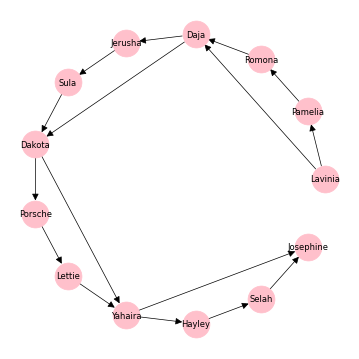


Causal context: A group of friends is going to a party where candies will be randomly distributed. Lavinia will be happy if she gets at least 5 candies. Pamelia will be happy if she gets at least 5 candies or if Lavinia is happy. Romona will be happy if she gets at least 5 candies or if Pamelia is happy. Daja will be happy if she gets at least 5 candies or if Lavinia is happy or if Romona is happy. Jerusha will be happy if she gets at least 5 candies or if Daja is happy. Sula will be happy if she gets at least 5 candies or if Jerusha is happy. Dakota will be happy if she gets at least 5 candies or if Daja is happy or if Sula is happy. Porsche will be happy if she gets at least 5 candies or if Dakota is happy. Lettie will be happy if she gets at least 5 candies or if Porsche is happy. Yahaira will be happy if she gets at least 5 candies or if Dakota is happy or if Lettie is happy. Hayley will be happy if she gets at least 5 candies or if Yahaira is happy. Selah will be happy if she get

In [21]:
size = [4,4,4,4]
tg = CandyParty(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())

## Generate dataset

In [22]:
# x levels of graphical complexity (captured by BCC size).
# y tasks per graphical complexity level.
# z samples per task.
# = x*y*z subtasks.
graph_sizes = [[3,3,3]]
n_tasks_per_size = 3
n_samples_per_task = 5000

df = dg.get_dataset(task_generator = CandyParty,
                    graph_sizes = graph_sizes,
                    n_tasks_per_size = n_tasks_per_size,
                    n_samples_per_task = n_samples_per_task)

display(df)

Task ID  Context ID  Sample ID Nodes per BCC  \
0         0.0           0          0     [3, 3, 3]   
1         0.1           0          1     [3, 3, 3]   
2         0.2           0          2     [3, 3, 3]   
3         0.3           0          3     [3, 3, 3]   
4         0.4           0          4     [3, 3, 3]   
...       ...         ...        ...           ...   
14995  2.4995           2       4995     [3, 3, 3]   
14996  2.4996           2       4996     [3, 3, 3]   
14997  2.4997           2       4997     [3, 3, 3]   
14998  2.4998           2       4998     [3, 3, 3]   
14999  2.4999           2       4999     [3, 3, 3]   

                                    DAG adjacency matrix  \
0      [[0, 1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0],...   
1      [[0, 1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0],...   
2      [[0, 1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0],...   
3      [[0, 1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0],...   
4      [[0, 1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0],...   
...                                                  ...   
14995  [[0, 1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0],...   
14996  [[0, 1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0],...   
14997  [[0, 1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0],...   
14998  [[0, 1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0],...   
14999  [[0, 1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0],...   

                                               DAG nodes  \
0      [Jeanna, Bernita, Caren, Jalyn, Celesta, Clair...   
1      [Jeanna, Bernita, Caren, Jalyn, Celesta, Clair...   
2      [Jeanna, Bernita, Caren, Jalyn, Celesta, Clair...   
3      [Jeanna, Bernita, Caren, Jalyn, Celesta, Clair...   
4      [Jeanna, Bernita, Caren, Jalyn, Celesta, Clair...   
...                                                  ...   
14995  [Wilhelmine, Teresa, Yasmine, Jo, Tilda, Luver...   
14996  [Wilhelmine, Teresa, Yasmine, Jo, Tilda, Luver...   
14997  [Wilhelmine, Teresa, Yasmine, Jo, Tilda, Luver...   
14998  [Wilhelmine, Teresa, Yasmine, Jo, Tilda, Luver...   
14999  [Wilhelmine, Teresa, Yasmine, Jo, Tilda, Luver...   

                                    CCT adjacency matrix  \
0      [[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...   
1      [[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...   
2      [[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...   
3      [[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...   
4      [[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...   
...                                                  ...   
14995  [[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...   
14996  [[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...   
14997  [[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...   
14998  [[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...   
14999  [[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...   

                                CCT nodes  \
0         [Jeanna, Caren, Celesta, Oneta]   
1         [Jeanna, Caren, Celesta, Oneta]   
2         [Jeanna, Caren, Celesta, Oneta]   
3         [Jeanna, Caren, Celesta, Oneta]   
4         [Jeanna, Caren, Celesta, Oneta]   
...                                   ...   
14995  [Wilhelmine, Yasmine, Tilda, Noel]   
14996  [Wilhelmine, Yasmine, Tilda, Noel]   
14997  [Wilhelmine, Yasmine, Tilda, Noel]   
14998  [Wilhelmine, Yasmine, Tilda, Noel]   
14999  [Wilhelmine, Yasmine, Tilda, Noel]   

                              Exogenous variables  \
0      [OF0B, RCL9, 28Y1, FHH0, R9I5, C1P9, RA1Q]   
1      [OF0B, RCL9, 28Y1, FHH0, R9I5, C1P9, RA1Q]   
2      [OF0B, RCL9, 28Y1, FHH0, R9I5, C1P9, RA1Q]   
3      [OF0B, RCL9, 28Y1, FHH0, R9I5, C1P9, RA1Q]   
4      [OF0B, RCL9, 28Y1, FHH0, R9I5, C1P9, RA1Q]   
...                                           ...   
14995  [SFH5, T83M, 5BYR, KJUG, 3ZOL, PTHJ, OTD4]   
14996  [SFH5, T83M, 5BYR, KJUG, 3ZOL, PTHJ, OTD4]   
14997  [SFH5, T83M, 5BYR, KJUG, 3ZOL, PTHJ, OTD4]   
14998  [SFH5, T83M, 5BYR, KJUG, 3ZOL, PTHJ, OTD4]   
14999  [SFH5, T83M, 5BYR, KJUG, 3ZOL, PTHJ, OTD4]   

                

In [23]:
# Process prompts.
df_factual, df_cf = dg.process_prompts()
display(df_factual)
display(df_cf)

Task ID  Context ID  Sample ID Nodes per BCC   Effect  \
0         0.0           0          0     [3, 3, 3]    Oneta   
1         0.0           0          0     [3, 3, 3]    Caren   
2         0.0           0          0     [3, 3, 3]  Celesta   
3         0.1           0          1     [3, 3, 3]    Oneta   
4         0.1           0          1     [3, 3, 3]    Caren   
...       ...         ...        ...           ...      ...   
44995  2.4998           2       4998     [3, 3, 3]  Yasmine   
44996  2.4998           2       4998     [3, 3, 3]    Tilda   
44997  2.4999           2       4999     [3, 3, 3]     Noel   
44998  2.4999           2       4999     [3, 3, 3]  Yasmine   
44999  2.4999           2       4999     [3, 3, 3]    Tilda   

                                                  Prompt  True  
0      A group of friends is going to a party where c...     1  
1      A group of friends is going to a party where c...     0  
2      A group of friends is going to a party where c...     0  
3      A group of friends is going to a party where c...     1  
4      A group of friends is going to a party where c...     1  
...                                                  ...   ...  
44995  A group of friends is going to a party where c...     1  
44996  A group of friends is going to a party where c...     1  
44997  A group of friends is going to a party where c...     1  
44998  A group of friends is going to a party where c...     1  
44999  A group of friends is going to a party where c...     1  

[45000 rows x 7 columns]

Task ID  Context ID  Sample ID Nodes per BCC      Cause-effect pair  \
0         0.0           0          0     [3, 3, 3]        (Jeanna, Oneta)   
1         0.0           0          0     [3, 3, 3]        (Jeanna, Caren)   
2         0.0           0          0     [3, 3, 3]      (Jeanna, Celesta)   
3         0.0           0          0     [3, 3, 3]       (Caren, Celesta)   
4         0.0           0          0     [3, 3, 3]         (Caren, Oneta)   
...       ...         ...        ...           ...                    ...   
89995  2.4999           2       4999     [3, 3, 3]  (Wilhelmine, Yasmine)   
89996  2.4999           2       4999     [3, 3, 3]    (Wilhelmine, Tilda)   
89997  2.4999           2       4999     [3, 3, 3]       (Yasmine, Tilda)   
89998  2.4999           2       4999     [3, 3, 3]        (Yasmine, Noel)   
89999  2.4999           2       4999     [3, 3, 3]          (Tilda, Noel)   

            Cause   Effect                              Prompt (cause = True)  \
0          Jeanna    Oneta  A group of friends is going to a party where c...   
1          Jeanna    Caren  A group of friends is going to a party where c...   
2          Jeanna  Celesta  A group of friends is going to a party where c...   
3           Caren  Celesta  A group of friends is going to a party where c...   
4           Caren    Oneta  A group of friends is going to a party where c...   
...           ...      ...                                                ...   
89995  Wilhelmine  Yasmine  A group of friends is going to a party where c...   
89996  Wilhelmine    Tilda  A group of friends is going to a party where c...   
89997     Yasmine    Tilda  A group of friends is going to a party where c...   
89998     Yasmine     Noel  A group of friends is going to a party where c...   
89999       Tilda     Noel  A group of friends is going to a party where c...   

       True (cause = True)                             Prompt (cause = False)  \
0                        1  A group of friends is going to a party where c...   
1                        1  A group of friends is going to a party where c...   
2                        1  A group of friends is going to a party where c...   
3                        1  A group of friends is going to a party where c...   
4                        1  A group of friends is going to a party where c...   
...                    ...                                                ...   
89995                    1  A group of friends is going to a party where c...   
89996                    1  A group of friends is going to a party where c...   
89997                    1  A group of friends is going to a party where c...   
89998                    1  A group of friends is going to a party where c...   
89999                    1  A group of friends is going to a party where c...   

       True (cause = False)  
0                         1  
1                         0  
2                         0  
3                         0  
4                         1  
...                     ...  
89995                     1  
89996                     1  
89997                     1  
89998                     1  
89999                     1  

[90000 rows x 11 columns]

In [24]:
pns_dict = dg.get_pns_dict(verbose = True)
pns_dict

-- PNS = 0.0164 | ATE = 0.01639999999999997 --
-- PNS = 0.2474 | ATE = 0.24739999999999995 --
-- PNS = 0.0612 | ATE = 0.06120000000000003 --
-- PNS = 0.2544 | ATE = 0.25439999999999996 --
-- PNS = 0.0664 | ATE = 0.06640000000000001 --
-- PNS = 0.2566 | ATE = 0.25660000000000005 --
-- PNS = 0.0148 | ATE = 0.014800000000000035 --
-- PNS = 0.2482 | ATE = 0.24819999999999998 --
-- PNS = 0.0654 | ATE = 0.06540000000000001 --
-- PNS = 0.2492 | ATE = 0.24919999999999998 --
-- PNS = 0.063 | ATE = 0.06299999999999994 --
-- PNS = 0.2458 | ATE = 0.24580000000000002 --
-- PNS = 0.0144 | ATE = 0.014399999999999968 --
-- PNS = 0.2592 | ATE = 0.2592 --
-- PNS = 0.0636 | ATE = 0.06359999999999999 --
-- PNS = 0.25 | ATE = 0.25 --
-- PNS = 0.061 | ATE = 0.061000000000000054 --
-- PNS = 0.255 | ATE = 0.255 --


{0: {"('Jeanna', 'Oneta')": 0.0164,
  "('Jeanna', 'Caren')": 0.2474,
  "('Jeanna', 'Celesta')": 0.0612,
  "('Caren', 'Celesta')": 0.2544,
  "('Caren', 'Oneta')": 0.0664,
  "('Celesta', 'Oneta')": 0.2566,
  "[('Jeanna', 'Caren'), ('Caren', 'Celesta'), ('Celesta', 'Oneta')]": 0.016150034496000002,
  "[('Jeanna', 'Caren'), ('Caren', 'Oneta')]": 0.016427360000000002,
  "[('Jeanna', 'Celesta'), ('Celesta', 'Oneta')]": 0.01570392},
 1: {"('Ottilia', 'Esperanza')": 0.0148,
  "('Ottilia', 'Tatia')": 0.2482,
  "('Ottilia', 'Dannie')": 0.0654,
  "('Tatia', 'Dannie')": 0.2492,
  "('Tatia', 'Esperanza')": 0.063,
  "('Dannie', 'Esperanza')": 0.2458,
  "[('Ottilia', 'Tatia'), ('Tatia', 'Dannie'), ('Dannie', 'Esperanza')]": 0.015203083951999999,
  "[('Ottilia', 'Tatia'), ('Tatia', 'Esperanza')]": 0.0156366,
  "[('Ottilia', 'Dannie'), ('Dannie', 'Esperanza')]": 0.01607532},
 2: {"('Wilhelmine', 'Noel')": 0.0144,
  "('Wilhelmine', 'Yasmine')": 0.2592,
  "('Wilhelmine', 'Tilda')": 0.0636,
  "('Yasmine',

In [25]:
threshold_dict = dg.get_internal_consistency_thresholds(multiplier = 1.25)
threshold_dict

{0: {"[('Jeanna', 'Caren'), ('Caren', 'Celesta'), ('Celesta', 'Oneta')]": 0.019052248780487748,
  "[('Jeanna', 'Caren'), ('Caren', 'Oneta')]": 0.0020853658536585805,
  "[('Jeanna', 'Celesta'), ('Celesta', 'Oneta')]": 0.05305487804878061},
 1: {"[('Ottilia', 'Tatia'), ('Tatia', 'Dannie'), ('Dannie', 'Esperanza')]": 0.034044252702702546,
  "[('Ottilia', 'Tatia'), ('Tatia', 'Esperanza')]": 0.07065878378378376,
  "[('Ottilia', 'Dannie'), ('Dannie', 'Esperanza')]": 0.10771283783783782},
 2: {"[('Wilhelmine', 'Yasmine'), ('Yasmine', 'Tilda'), ('Tilda', 'Noel')]": 0.1843750000000001,
  "[('Wilhelmine', 'Yasmine'), ('Yasmine', 'Noel')]": 0.12249999999999982,
  "[('Wilhelmine', 'Tilda'), ('Tilda', 'Noel')]": 0.15781250000000002}}

In [26]:
df_cf[df_cf["Context ID"] == 0]

Task ID  Context ID  Sample ID Nodes per BCC  Cause-effect pair  \
0         0.0           0          0     [3, 3, 3]    (Jeanna, Oneta)   
1         0.0           0          0     [3, 3, 3]    (Jeanna, Caren)   
2         0.0           0          0     [3, 3, 3]  (Jeanna, Celesta)   
3         0.0           0          0     [3, 3, 3]   (Caren, Celesta)   
4         0.0           0          0     [3, 3, 3]     (Caren, Oneta)   
...       ...         ...        ...           ...                ...   
29995  0.4999           0       4999     [3, 3, 3]    (Jeanna, Caren)   
29996  0.4999           0       4999     [3, 3, 3]  (Jeanna, Celesta)   
29997  0.4999           0       4999     [3, 3, 3]   (Caren, Celesta)   
29998  0.4999           0       4999     [3, 3, 3]     (Caren, Oneta)   
29999  0.4999           0       4999     [3, 3, 3]   (Celesta, Oneta)   

         Cause   Effect                              Prompt (cause = True)  \
0       Jeanna    Oneta  A group of friends is going to a party where c...   
1       Jeanna    Caren  A group of friends is going to a party where c...   
2       Jeanna  Celesta  A group of friends is going to a party where c...   
3        Caren  Celesta  A group of friends is going to a party where c...   
4        Caren    Oneta  A group of friends is going to a party where c...   
...        ...      ...                                                ...   
29995   Jeanna    Caren  A group of friends is going to a party where c...   
29996   Jeanna  Celesta  A group of friends is going to a party where c...   
29997    Caren  Celesta  A group of friends is going to a party where c...   
29998    Caren    Oneta  A group of friends is going to a party where c...   
29999  Celesta    Oneta  A group of friends is going to a party where c...   

       True (cause = True)                             Prompt (cause = False)  \
0                        1  A group of friends is going to a party where c...   
1                        1  A group of friends is going to a party where c...   
2                        1  A group of friends is going to a party where c...   
3                        1  A group of friends is going to a party where c...   
4                        1  A group of friends is going to a party where c...   
...                    ...                                                ...   
29995                    1  A group of friends is going to a party where c...   
29996                    1  A group of friends is going to a party where c...   
29997                    1  A group of friends is going to a party where c...   
29998                    1  A group of friends is going to a party where c...   
29999                    1  A group of friends is going to a party where c...   

       True (cause = False)  
0                         1  
1                         0  
2                         0  
3                         0  
4                         1  
...                     ...  
29995                     0  
29996                     1  
29997                     1  
29998                     1  
29999                     1  

[30000 rows x 11 columns]

## End of document